# 통계학특강 과제1

In [1]:
package_version(R.version)

[1] ‘4.0.4’

In [2]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyverse)
library(nycflights13)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
str(flights)

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



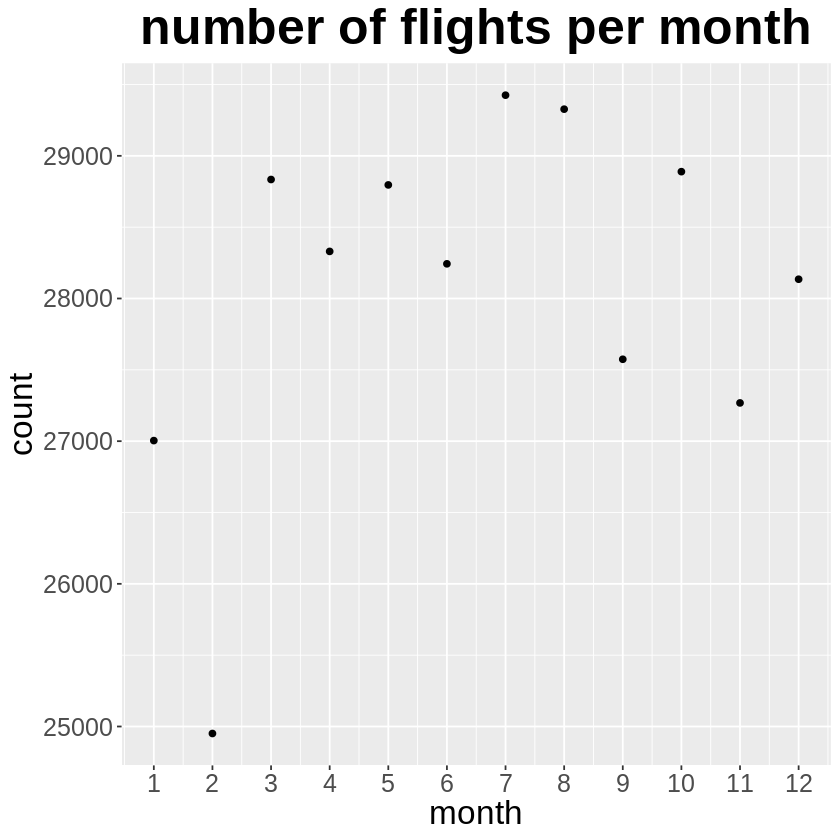

In [5]:
flights %>%
  group_by(year, month) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = month, y = count)) +
  geom_point() + 
  ggtitle("number of flights per month") + 
  theme(plot.title = element_text(size = 30, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15)) + 
  scale_x_continuous(breaks = c(1:12))

2월의 비행 건 수가 가장 낮고 7월의 비행 건 수가 가장 높은 것을 알 수 있다.

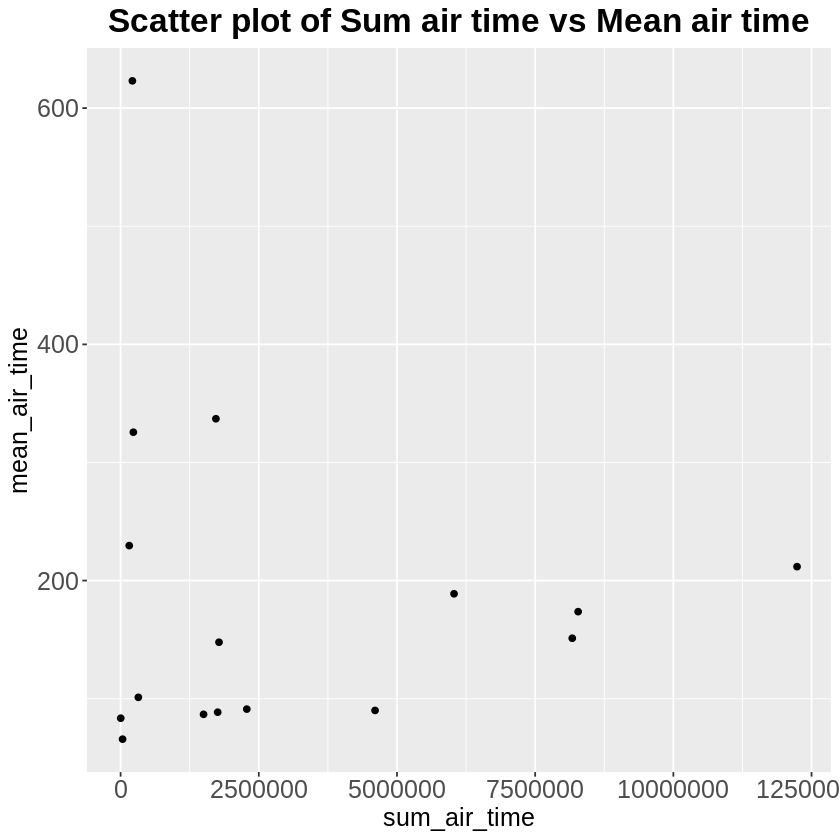

In [6]:
flights %>%
  group_by(carrier) %>%
  summarise(count = n(),
            sum_air_time = sum(air_time, na.rm = TRUE),
            mean_air_time = mean(air_time, na.rm = TRUE)) %>%
  arrange(desc(mean_air_time)) %>%
  ggplot(aes(sum_air_time, mean_air_time)) + 
  geom_point() + 
  ggtitle("Scatter plot of Sum air time vs Mean air time") + 
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 15),
        axis.text = element_text(size = 15))

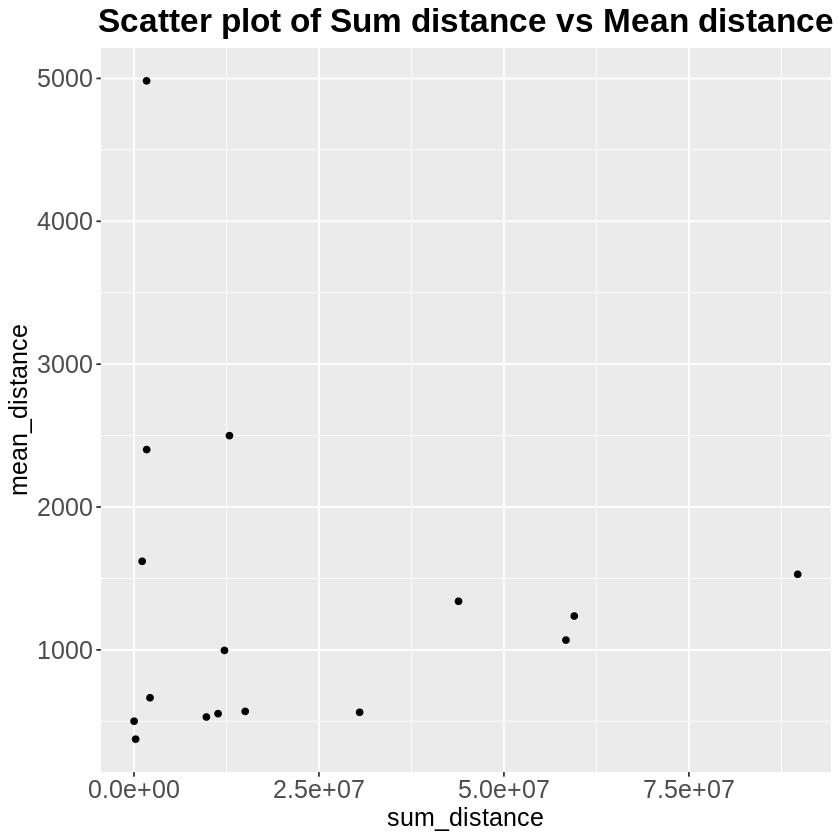

In [7]:
flights %>%
  group_by(carrier) %>%
  summarise(count = n(),
            sum_distance = sum(distance, na.rm = TRUE),
            mean_distance = mean(distance, na.rm = TRUE)) %>%
  arrange(desc(mean_distance)) %>%
  ggplot(aes(sum_distance, mean_distance)) + 
  geom_point() + 
  ggtitle("Scatter plot of Sum distance vs Mean distance") + 
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 15),
        axis.text = element_text(size = 15))

항공사별로 이동 시간의 합과 평균의 산점도와 이동 거리의 합과 평균의 산점도를 출력하였다. 이동 시간과 이동 거리 그래프를 봤을 때, 합이 높을수록 평균은 높지 않지만 두 그래프의 양상은 비슷해보인다.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



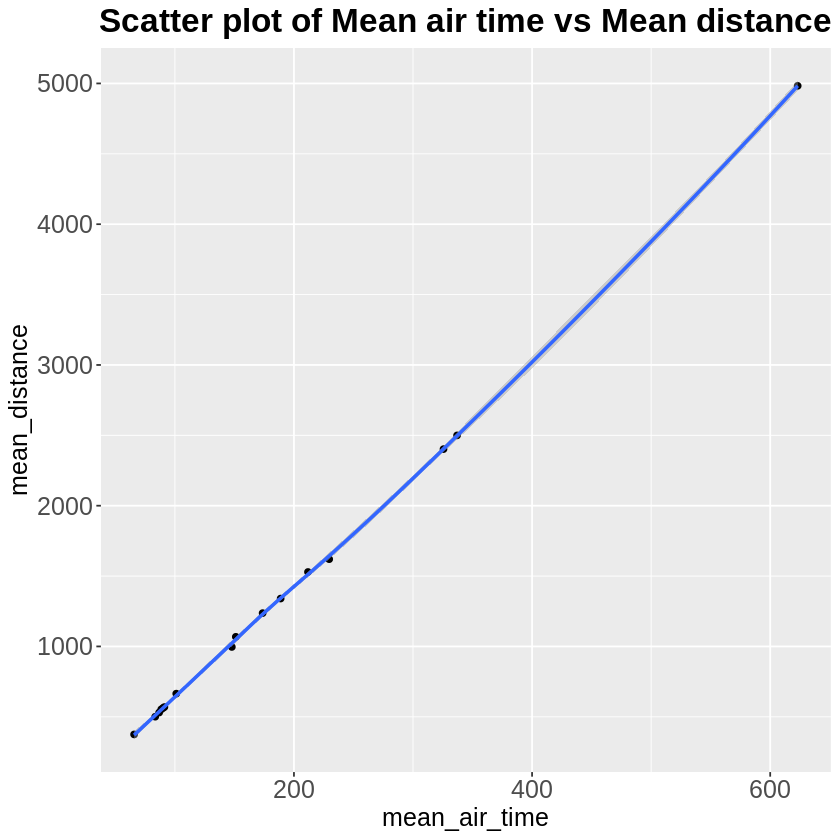

In [8]:
flights %>%
  group_by(carrier) %>%
  summarise(count = n(),
            mean_air_time = mean(air_time, na.rm = TRUE),
            mean_distance = mean(distance, na.rm = TRUE)) %>%
  ggplot(aes(x = mean_air_time, y = mean_distance)) + 
  geom_point() + 
  geom_smooth() + 
  ggtitle("Scatter plot of Mean air time vs Mean distance") + 
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 15),
        axis.text = element_text(size = 15))

그래프 상으로 확인했을 때 평균 이동 시간이 클수록 평균 이동 거리가 크다는 것을 확인할 수 있다.

In [9]:
flights %>%
  group_by(origin, dest) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(10)

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



origin,dest,count
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


출발 항공 - 도착 항공 운행이 가장 많은 공항 10개는 위와 같다.